# How to Evaluate and Compare ETFs

Ideas for this came from [How to Evaluate and Compare ETFs](https://stablebread.com/how-to-evaluate-and-compare-etfs/)


### Tracking Efficiency
Tracking efficiency refers to how well a particular ETF tracks the underlying index it's designated to track. In large, this is the entire reason ETFs exist (to deliver identical returns for a particular index), so ensuring that an ETF closely tracks its underlying index is crucial. This section of the article will therefore explain what to examine to best evaluate tracking efficiency. Typically, an ETF should only be considered for further evaluation if it manages to pass this check.

To begin evaluating whether an ETF efficiently tracks its underlying index, you can examine "tracking error" and "tracking difference."


#### Tracking Error
"Tracking error" is the standard deviation of returns between the ETF and what the ETF is designated to track. In other words, tracking error is about the volatility in the difference of performance between an ETF and its index. Tracking error therefore does not provide any insight on an ETF's performance.

Tracking error can be calculated using the formula below:




<span style='background :yellow' > Tracking error = Standard deviation of (P - B) </span>

where:

P = portfolio return
B = benchmark return

Calculating the standard deviation of a data series for daily differences in tracking error will result in a number, which can then be used to compare against other ETFs who are tracking that same index. Obviously, the lower the tracking error number, the better.


In [1]:
# import required packages
import pandas as pd
import numpy as np
import requests
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

## I will analyse VAS (VANGUARD AUSTRALIAN SHARES INDEX ETF)

### download 1-year+ closing price data for an ETF and its benchmark index.
The ETF seeks to track the return (income and capital appreciation) of the S&P/ASX 300 Index before taking into account fund fees, expenses, and tax. The S&P/ASX 300 Accumulation Index is a free-float adjusted capitalisation weighted index of approximately 300 Australian equities (shares) representing over 90 per cent of the value of all Australian based companies and property trusts listed on the ASX.





In [2]:
# create a ticker object for VAS
vas = yf.Ticker("vas.ax")
vas

yfinance.Ticker object <VAS.AX>

In [3]:
# using period = "1y" downloads last year of price data
vas_historical = vas.history(period = "1y", interval="1d")

In [4]:
vas_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-12,89.410004,89.500000,89.010002,89.260002,170916,0,0
2021-04-13,89.470001,89.570000,89.059998,89.120003,209759,0,0
2021-04-14,89.610001,89.940002,89.300003,89.889999,146785,0,0
2021-04-15,89.610001,90.500000,89.389999,90.320000,184449,0,0
2021-04-16,90.540001,90.540001,89.949997,90.370003,138895,0,0
...,...,...,...,...,...,...,...
2022-04-06,94.940002,95.199997,94.440002,95.139999,170782,0,0
2022-04-07,94.629997,94.800003,94.440002,94.510002,168138,0,0
2022-04-08,95.000000,95.089996,94.669998,94.940002,171177,0,0


In [5]:
# create a ticker object for S&P ASX 300 Index
asx_300 = yf.Ticker("^AXKO")

In [6]:
asx_300_historical = asx_300.history(period = "1y", interval="1d")

In [7]:
asx_300_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-12,6987.500000,6987.500000,6947.799805,6963.799805,536900,0,0
2021-04-13,6965.000000,6987.899902,6954.100098,6967.500000,608500,0,0
2021-04-14,6974.600098,7019.600098,6973.600098,7015.700195,1058000,0,0
2021-04-15,7025.799805,7063.500000,6981.899902,7050.399902,830000,0,0
2021-04-16,7055.600098,7059.399902,7023.899902,7057.299805,792200,0,0
...,...,...,...,...,...,...,...
2022-04-06,7508.100098,7508.100098,7441.000000,7491.500000,1029800,0,0
2022-04-07,7483.899902,7483.899902,7437.000000,7441.299805,916000,0,0
2022-04-08,7454.500000,7491.299805,7452.200195,7476.899902,831700,0,0


In [8]:
# Calculate percentage returns for each fund in separate columns (i.e., ((new/old) - 1)) using pandas df.pct_change()

vas_historical['Close'].pct_change().dropna()

Date
2021-04-13   -0.001568
2021-04-14    0.008640
2021-04-15    0.004784
2021-04-16    0.000554
2021-04-19    0.000553
                ...   
2022-04-06   -0.005332
2022-04-07   -0.006622
2022-04-08    0.004550
2022-04-11    0.001264
2022-04-12   -0.004839
Name: Close, Length: 256, dtype: float64

In [9]:
asx_300_historical['Close'].pct_change().dropna()*100

Date
2021-04-13    0.053135
2021-04-14    0.691786
2021-04-15    0.494601
2021-04-16    0.097865
2021-04-19    0.024091
                ...   
2022-04-06   -0.531103
2022-04-07   -0.670095
2022-04-08    0.478412
2022-04-11    0.084263
2022-04-12   -0.439657
Name: Close, Length: 256, dtype: float64

In [10]:
# Tracking error = Standard deviation of (P - B)

(vas_historical['Close'].pct_change()-asx_300_historical["Close"].pct_change()).std()*100

0.20160912591367444

## Tracking error 

### SPY and SPX regression analysis

In [11]:
# data is for 1-year of  the SPY ETF and the S&P 500 Index (SPX)
# will use to compare against How to evaluate ETF's website
path = r'/home/roddyb/R_Baker_Stock_Research/data/interim/SPY-and-SPX-regression.csv'

In [12]:
df = pd.read_csv(path, index_col = 0, parse_dates = True, infer_datetime_format=True)

In [13]:
df.sort_values(by='Date', inplace=True)


In [14]:
spx_returns = df['SPX Close'].pct_change().dropna()*100
spx_returns.head()

Date
2020-10-20    0.472728
2020-10-21   -0.219568
2020-10-22    0.521895
2020-10-23    0.344579
2020-10-26   -1.858954
Name: SPX Close, dtype: float64

In [15]:
spy_returns = df['SPY Close'].pct_change().dropna()*100
spy_returns.head()

Date
2020-10-20    0.400573
2020-10-21   -0.189295
2020-10-22    0.548537
2020-10-23    0.339514
2020-10-26   -1.847996
Name: SPY Close, dtype: float64

In [16]:
(spy_returns-spx_returns).std()

0.06809640675056043

In [17]:
(df['SPY Close'].pct_change()- df['SPX Close'].pct_change()).std()*100

0.06809640675056036

In [18]:
# calculate correlation coefficient with np
np.corrcoef(spy_returns, spx_returns)

array([[1.        , 0.99680056],
       [0.99680056, 1.        ]])

In [19]:
spy_returns.corr(spx_returns)

0.9968005550478527

In [20]:
df

,SPX Close,SPY Close,SPX Returns,SPY Returns
Date,,,,
2020-10-19,3426.92,342.01,NaN,NaN
2020-10-20,3443.12,343.38,0.47%,0.40%
2020-10-21,3435.56,342.73,-0.22%,-0.19%
2020-10-22,3453.49,344.61,0.52%,0.55%
2020-10-23,3465.39,345.78,0.34%,0.34%
...,...,...,...,...
2021-10-11,4361.19,434.69,-0.69%,-0.72%
2021-10-12,4350.65,433.62,-0.24%,-0.25%
2021-10-13,4363.80,435.18,0.30%,0.36%


### Rolling return analysis

In [21]:
path_1 = r'/home/roddyb/R_Baker_Stock_Research/data/interim/SPY-and-SPX-Rolling-returns.csv'

In [22]:
df1 = pd.read_csv(path_1, index_col = 0, parse_dates = True, infer_datetime_format=True)

In [23]:
df1.sort_values(by='Date', inplace=True)

In [24]:
df1

,SPX Close,SPY Close
Date,,
2016-10-17,2126.50,212.38
2016-10-18,2139.60,213.71
2016-10-19,2144.29,214.28
2016-10-20,2141.34,213.88
2016-10-21,2141.16,213.98
...,...,...
2021-10-11,4361.19,434.69
2021-10-12,4350.65,433.62
2021-10-13,4363.80,435.18


<AxesSubplot:xlabel='Date'>

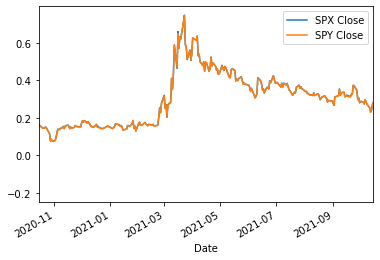

In [25]:
df1.pct_change(periods=252).plot(xlim = (pd.Timestamp('2020-10-15'), pd.Timestamp('2021-10-15')))

In [26]:
per_change = df1.pct_change(periods=252)

In [27]:
sliced = per_change.loc['2020-10-15' : '2021-10-15']

In [28]:
sliced['SPX Close'].mean()*100

30.39677216560116

In [29]:
sliced['SPY Close'].mean()*100

30.314779719517816

In [30]:
Tracking_difference = sliced['SPY Close'].mean()*100 - sliced['SPX Close'].mean()*100

In [31]:
Tracking_difference

-0.0819924460833441

In [32]:
sliced

,SPX Close,SPY Close
Date,,
2020-10-15,0.165117,0.164544
2020-10-16,0.162064,0.160418
2020-10-19,0.147586,0.147800
2020-10-20,0.145142,0.144638
2020-10-21,0.146719,0.146216
...,...,...
2021-10-11,0.254250,0.253251
2021-10-12,0.231007,0.230372
2021-10-13,0.242565,0.242910


<AxesSubplot:xlabel='Date'>

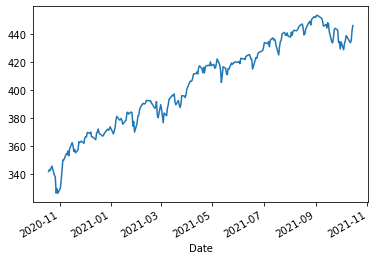

In [33]:
df['SPY Close'].plot()

<AxesSubplot:xlabel='Date'>

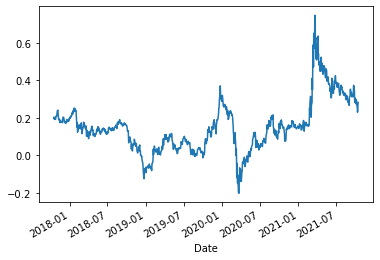

In [34]:
per_change['SPY Close'].plot()

<AxesSubplot:xlabel='Date'>

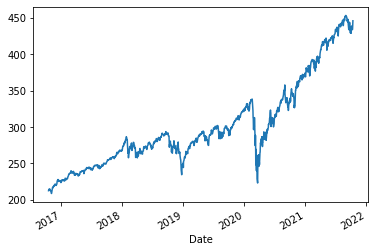

In [35]:
df1['SPY Close'].plot()

In [38]:
# create a ticker object for SPY
spy = yf.Ticker("SPY")
spy

yfinance.Ticker object <SPY>

In [39]:
# using period = "1y" downloads last year of price data
spy_historical = spy.history(period = "1y", interval="1d")

In [40]:
# create a ticker object for SPY
spx = yf.Ticker("^GSPC")
spx

yfinance.Ticker object <^GSPC>

In [41]:
# using period = "1y" downloads last year of price data
spx_historical = spx.history(period = "1y", interval="1d")

In [42]:
spx_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-07,4074.290039,4083.129883,4068.310059,4079.949951,4112640000,0,0
2021-04-08,4089.949951,4098.189941,4082.540039,4097.169922,3901910000,0,0
2021-04-09,4096.109863,4129.479980,4095.510010,4128.799805,3634910000,0,0
2021-04-12,4124.709961,4131.759766,4114.819824,4127.990234,3578500000,0,0
2021-04-13,4130.100098,4148.000000,4124.430176,4141.589844,3728440000,0,0
...,...,...,...,...,...,...,...
2022-03-31,4599.020020,4603.069824,4530.410156,4530.410156,3782040000,0,0
2022-04-01,4540.319824,4548.700195,4507.569824,4545.859863,3828290000,0,0
2022-04-04,4547.970215,4583.500000,4539.209961,4582.640137,3833500000,0,0


In [45]:
(spy_historical['Close'].pct_change()- spx_historical['Close'].pct_change()).std()*100

0.040062072167969046